In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv

Welcome to JupyROOT 6.26/04


In [2]:
# csvname="/Users/kunori/skdir/CAEN/dfiles/run7/Run7_list.csv"
# csvname="/Users/kunori/skdir/CAEN/dfiles/test_beam_setup_run16/Run16_list.csv"
# csvname="/Users/kunori/skdir/CAEN/dfiles/Run60_200Th_HV55_laser_04-04-23_boxclosed_OR64_att_GreenFib_withSintBars_LaserasExtTrigger/Run60_list.csv"
# (1)
# csvname="/Users/kunori/skdir/CAEN/dfiles/Run57_200Th_HV54p5_laser_10-03-23_TLogic_OR64_att_trefTlogic_trefWindow100_trefDelay-m50/Run57_list.csv"
csvname="/Users/kunori/skdir/CAEN/dfiles/MuonTestStand/Run25_list.csv"

sipm2caen=np.array([61,63,32,34,29,31,0,2,
          59,57,38,36,27,25,6,4,
          53,55,40,42,21,23,8,10,
          51,49,46,44,19,17,14,12,
          45,47,48,50,13,15,16,18,
          43,41,54,52,11,9,22,20,
          37,39,56,58,5,7,24,26,
           35,33,62,60,3,1,30,28])

caen2sipm=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2sipm[sipm2caen[k]]=i
    
print("caen2sipm",caen2sipm)

caen2sipm [ 6 61  7 60 15 52 14 53 22 45 23 44 31 36 30 37 38 29 39 28 47 20 46 21
 54 13 55 12 63  4 62  5  2 57  3 56 11 48 10 49 18 41 19 40 27 32 26 33
 34 25 35 24 43 16 42 17 50  9 51  8 59  0 58  1]


In [3]:
def unpackData(row):
    rtcode=0
    BoardID=int(row[0])
    TStamp=float(row[1])
    
    LG=np.zeros(64)
    HG=np.zeros(64)
    TOA=np.zeros(64)
    TOT=np.zeros(64)
    data_type=np.zeros(64,dtype=int)
    
    i=4
    while i<len(row):
        chid=int(row[i])
        dtype=str(row[i+1])
        LG[chid]=float(row[i+2])
        HG[chid]=float(row[i+3])
        # print(chid,dtype,LG[chid],HG[chid])
        i=i+4
        if dtype == "0x3":
            TOA[chid]=0.0
            TOT[chid]=0.0
            data_type[chid]=1
        elif dtype == "0x13":
            TOA[chid]=float(row[i])
            TOT[chid]=0.0
            data_type[chid]=2
            i=i+1
        elif dtype == "0x33":
            TOA[chid]=float(row[i])
            TOT[chid]=float(row[i+1])
            data_type[chid]=3
            i=i+2
        else:
            data_type[chid]=4
            print("unpackData:  unkown data_type",dtype)
            rtcode=1
        
    # print(BoardID,TStamp)
    return rtcode,TStamp,LG,HG,TOA,TOT,data_type
    
    

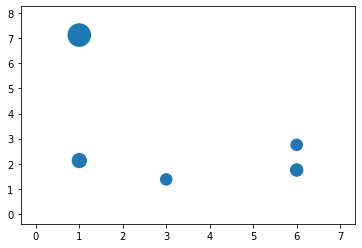

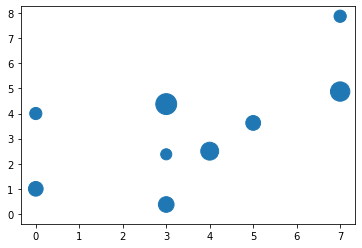

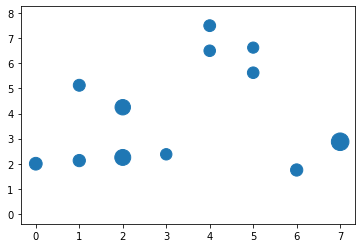

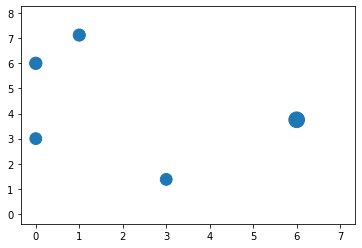

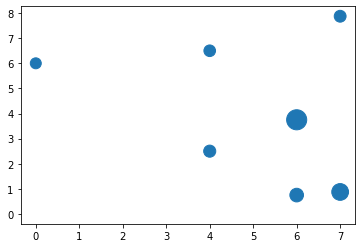

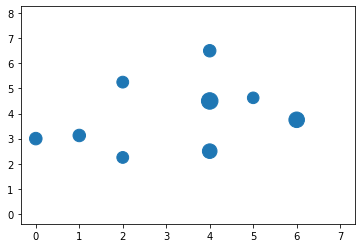

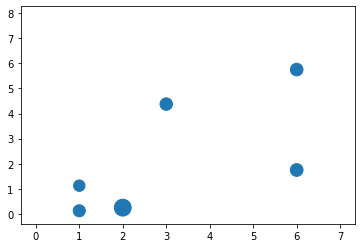

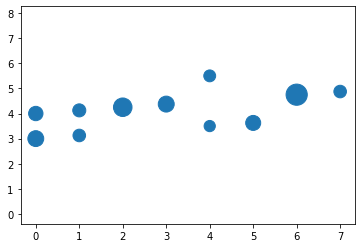

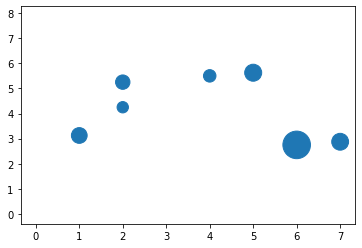

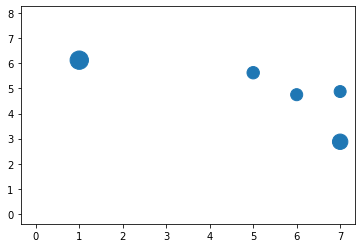

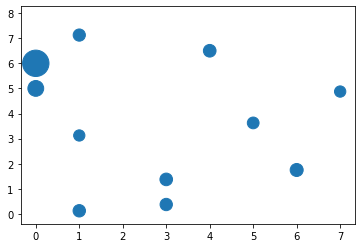

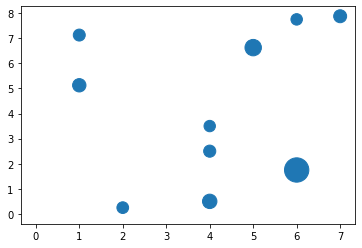

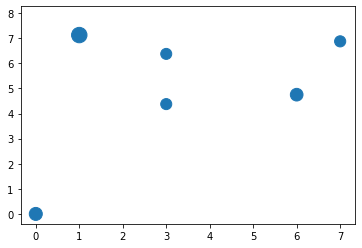

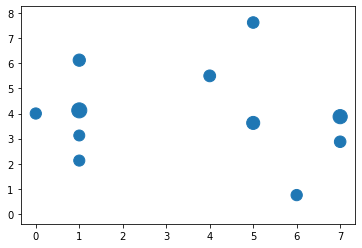

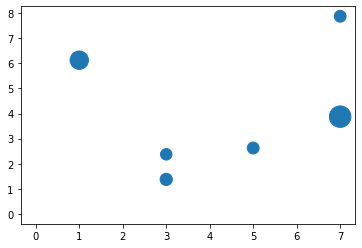

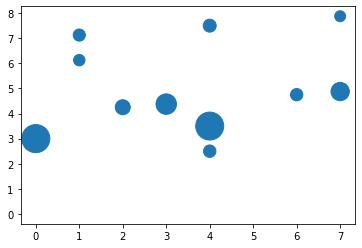

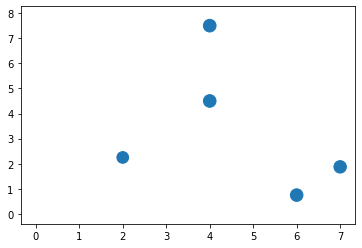

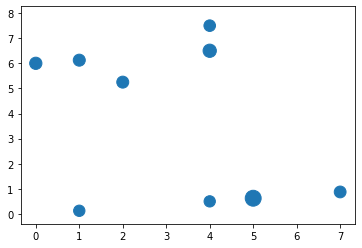

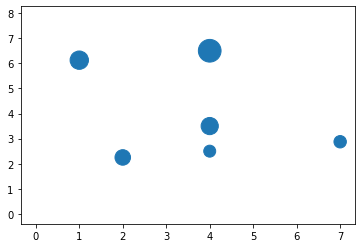

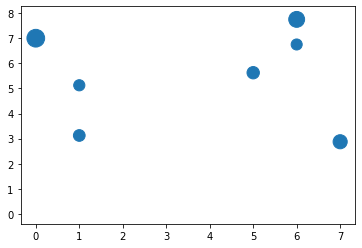

Total  1118  events are analyzed.


216001

In [4]:
h1={}
h2={}
hp={}

oname="histMuonAnalysis.root"
ofile=ROOT.TFile(oname,"RECREATE")

def defineHistograms():
    global ofile
    global h1,h2,hp
    
    s="ChID"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    s="ChID_dtype3"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)

    s="data_type_all"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="data_type_max"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="LG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_LG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="LG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)    
    s="a_LG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,2000.0)

    s="HG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)    
    s="a_HG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,2000.0)
    
    s="toa_all"
    h1[s]=ROOT.TH1D(s,s,1000,-1000.0,5000.0)
    s="a_toa_all"
    h1[s]=ROOT.TH1D(s,s,1000,-500.0,1000.0)
    
    s="tot_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_tot_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,100.0)

    for i in range(64):
        
        s="LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0) 
        s="toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        
        s="a_LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="a_HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0) 
        s="a_toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="a_tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0) 
    
    return

#   define all histograms here.
defineHistograms()

def fillHistograms(LG,HG,TOA,TOT,data_type):
    global h1,h2,hp
    
    lgtemp=np.copy(HG)
    lgtemp[lgtemp>4000.0]=0.0
    lgtemp[lgtemp<1.0]=0.0
    lgmax=np.amax(lgtemp)
    h1["LG_max"].Fill(lgmax)
    h1["a_LG_max"].Fill(lgmax)
    
    
    hgtemp=np.copy(HG)
    hgtemp[hgtemp>4000.0]=0.0
    hgtemp[hgtemp<140.0]=0.0
    hgmax=np.amax(hgtemp)
    h1["HG_max"].Fill(hgmax)
    h1["a_HG_max"].Fill(hgmax)
    
    datatypemax=np.amax(data_type)
    h1["data_type_max"].Fill(datatypemax)
    
    for i in range(0,64):
        h1["data_type_all"].Fill(data_type[i])
        if data_type[i]==3:
            h1["ChID_dtype3"].Fill(i)

        h1["LG_all"].Fill(LG[i])
        h1["a_LG_all"].Fill(LG[i])       
        
        h1["HG_all"].Fill(HG[i])
        h1["a_HG_all"].Fill(HG[i])
        if data_type[i]==3:
            h1["HG_all_dtype3"].Fill(HG[i])
            h1["a_HG_all_dtype3"].Fill(HG[i])
        s="HG_"+str(i)
        h1[s].Fill(HG[i])
        s="a_HG_"+str(i)
        h1[s].Fill(HG[i])
        
        if TOA[i]>0.0:      
            h1["toa_all"].Fill(TOA[i])
            h1["a_toa_all"].Fill(TOA[i])
            s="toa_"+str(i)
            h1[s].Fill(TOA[i])
            s="a_toa_"+str(i)
            h1[s].Fill(TOA[i])

        if TOT[i]>0.0:
            h1["tot_all"].Fill(TOT[i])
            h1["a_tot_all"].Fill(TOT[i])
            s="tot_"+str(i)
            h1[s].Fill(TOT[i])
            s="a_tot_"+str(i)
            h1[s].Fill(TOT[i])
        
    #  return to caller.
    return
    
def displayHits(HG):
    x=np.zeros(64)
    y=np.zeros(64)
    z=np.zeros(64)
    for i in range(0,64):
        j=caen2sipm[i]
        kx=j%8
        ky=j/8
        x[i]=float(kx)
        y[i]=float(ky)
        if HG[i]<2000.0:
            z[i]=HG[i]
                
    plt.scatter(x,y,z)
    plt.show()
    return

def analyzeRun():
    
    nhitDisplayMax=20
    nhitDisplay=0
    
    eventCount=0
    with open(csvname,"r") as csvfile:
        reader=csv.reader(csvfile)
        for ix, row in enumerate(reader):
            # print(ix,"  ",row)
            if ix<5:
                continue
                
            if ix>10000:
                break
            eventCount=eventCount+1
            rtcode,TStamp,LG,HG,TOA,TOT,data_type=unpackData(row)
            if rtcode>0:
                print("return code from unpackData is ",rtcode," Abort this job.")
                break

            fillHistograms(LG,HG,TOA,TOT,data_type)
            
            hgtemp=np.copy(HG)
            hgtemp[hgtemp>3000.0]=0.0
            hgtemp[hgtemp<120]=0.0   # v1=140
            hgmax=np.amax(hgtemp)
            # print("ix=",ix," hgmax=",hgmax)
            
            if hgmax>140.0 and nhitDisplay<nhitDisplayMax:
                nhitDisplay=nhitDisplay+1
                displayHits(hgtemp)
    return eventCount
                
#  loop over all events to analyze.                          
eventCount=analyzeRun()
print("Total ",eventCount," events are analyzed.")
# write histograms to output root histogram file
ofile.Write()

# 8x8 display shows hits with amplitude > 120 ( >= 1 pe)

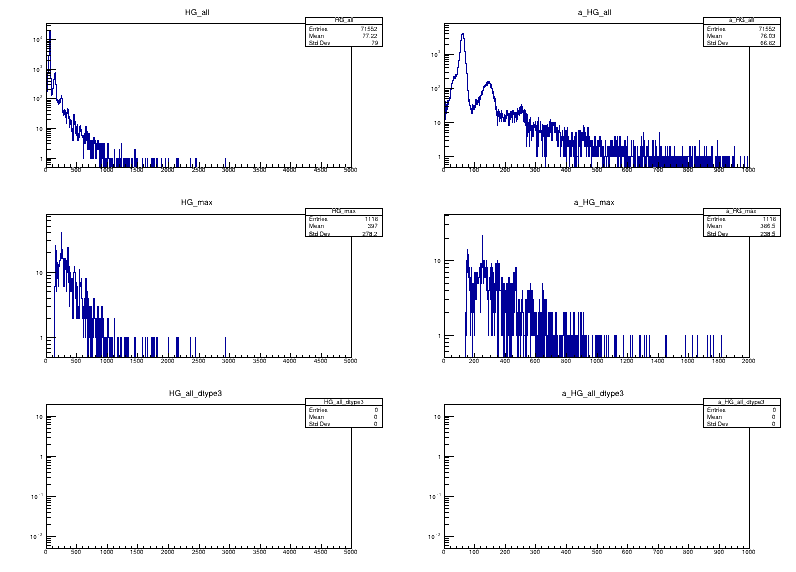

In [5]:
c0 = ROOT.TCanvas("c0","HGall",800,600)
c0.Divide(2,3)
c0.cd(1)
c0.GetPad(1).SetLogy()
h1["HG_all"].Draw()
c0.cd(2)
c0.GetPad(2).SetLogy()
h1["a_HG_all"].Draw()

c0.cd(3)
c0.GetPad(3).SetLogy()
h1["HG_max"].Draw()
c0.cd(4)
c0.GetPad(4).SetLogy()
h1["a_HG_max"].Draw()

c0.cd(5)
c0.GetPad(5).SetLogy()
h1["HG_all_dtype3"].Draw()
c0.cd(6)
c0.GetPad(6).SetLogy()
h1["a_HG_all_dtype3"].Draw()

c0.Draw()

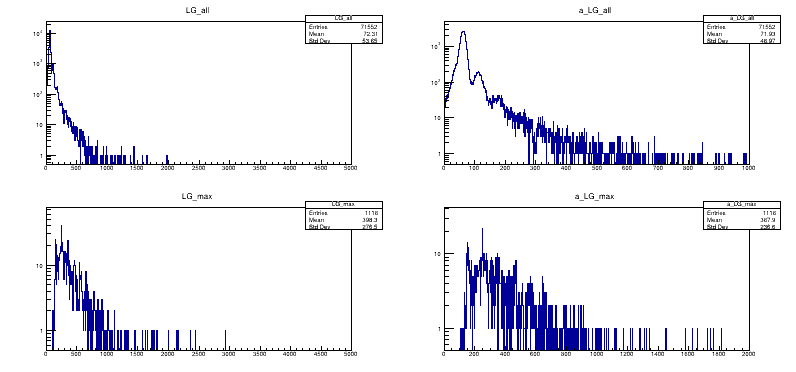

In [6]:
c0a = ROOT.TCanvas("c0a","LGall",800,400)
c0a.Divide(2,2)
c0a.cd(1)
c0a.GetPad(1).SetLogy()
h1["LG_all"].Draw()
c0a.cd(2)
c0a.GetPad(2).SetLogy()
h1["a_LG_all"].Draw()
c0a.cd(3)
c0a.GetPad(3).SetLogy()
h1["LG_max"].Draw()
c0a.cd(4)
c0a.GetPad(4).SetLogy()
h1["a_LG_max"].Draw()
c0a.Draw()

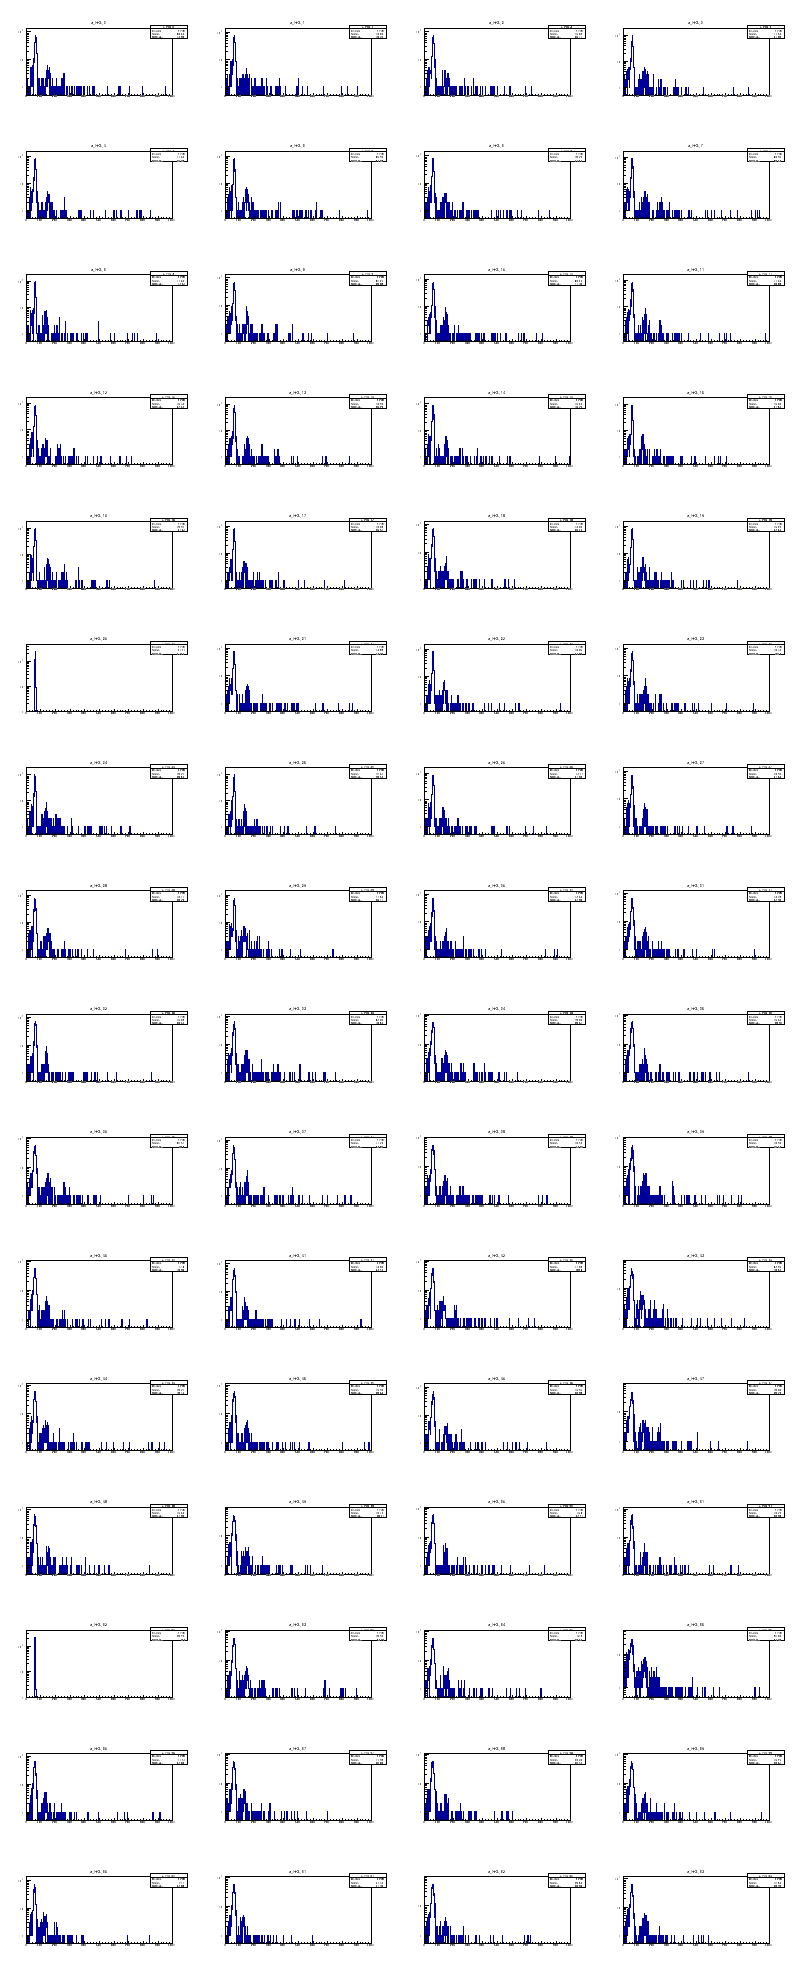

In [7]:
c1 = ROOT.TCanvas("c1","HG",800,2000)

c1.Divide(4,16)
for i in range(64):
    c1.cd(i+1)
    c1.GetPad(i+1).SetLogy()
    s="a_HG_"+str(i)
    h1[s].Draw()
c1.Draw()

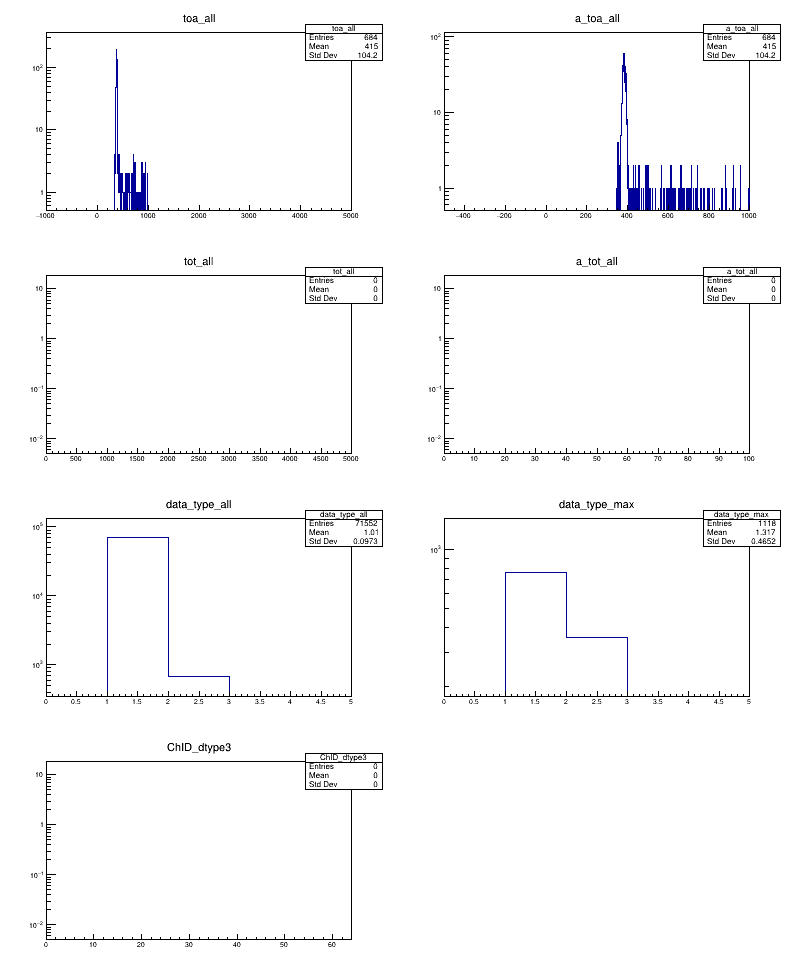

In [8]:
c2 = ROOT.TCanvas("c2","TOA",800,1000)

c2.Divide(2,4)
c2.cd(1)
c2.GetPad(1).SetLogy()
h1["toa_all"].Draw()
c2.cd(2)
c2.GetPad(2).SetLogy()
h1["a_toa_all"].Draw()
c2.cd(3)
c2.GetPad(3).SetLogy()
h1["tot_all"].Draw()
c2.cd(4)
c2.GetPad(4).SetLogy()
h1["a_tot_all"].Draw()
c2.cd(5)
c2.GetPad(5).SetLogy()
h1["data_type_all"].Draw()
c2.cd(6)
c2.GetPad(6).SetLogy()
h1["data_type_max"].Draw()
c2.cd(7)
c2.GetPad(7).SetLogy()
h1["ChID_dtype3"].Draw()
c2.Draw()

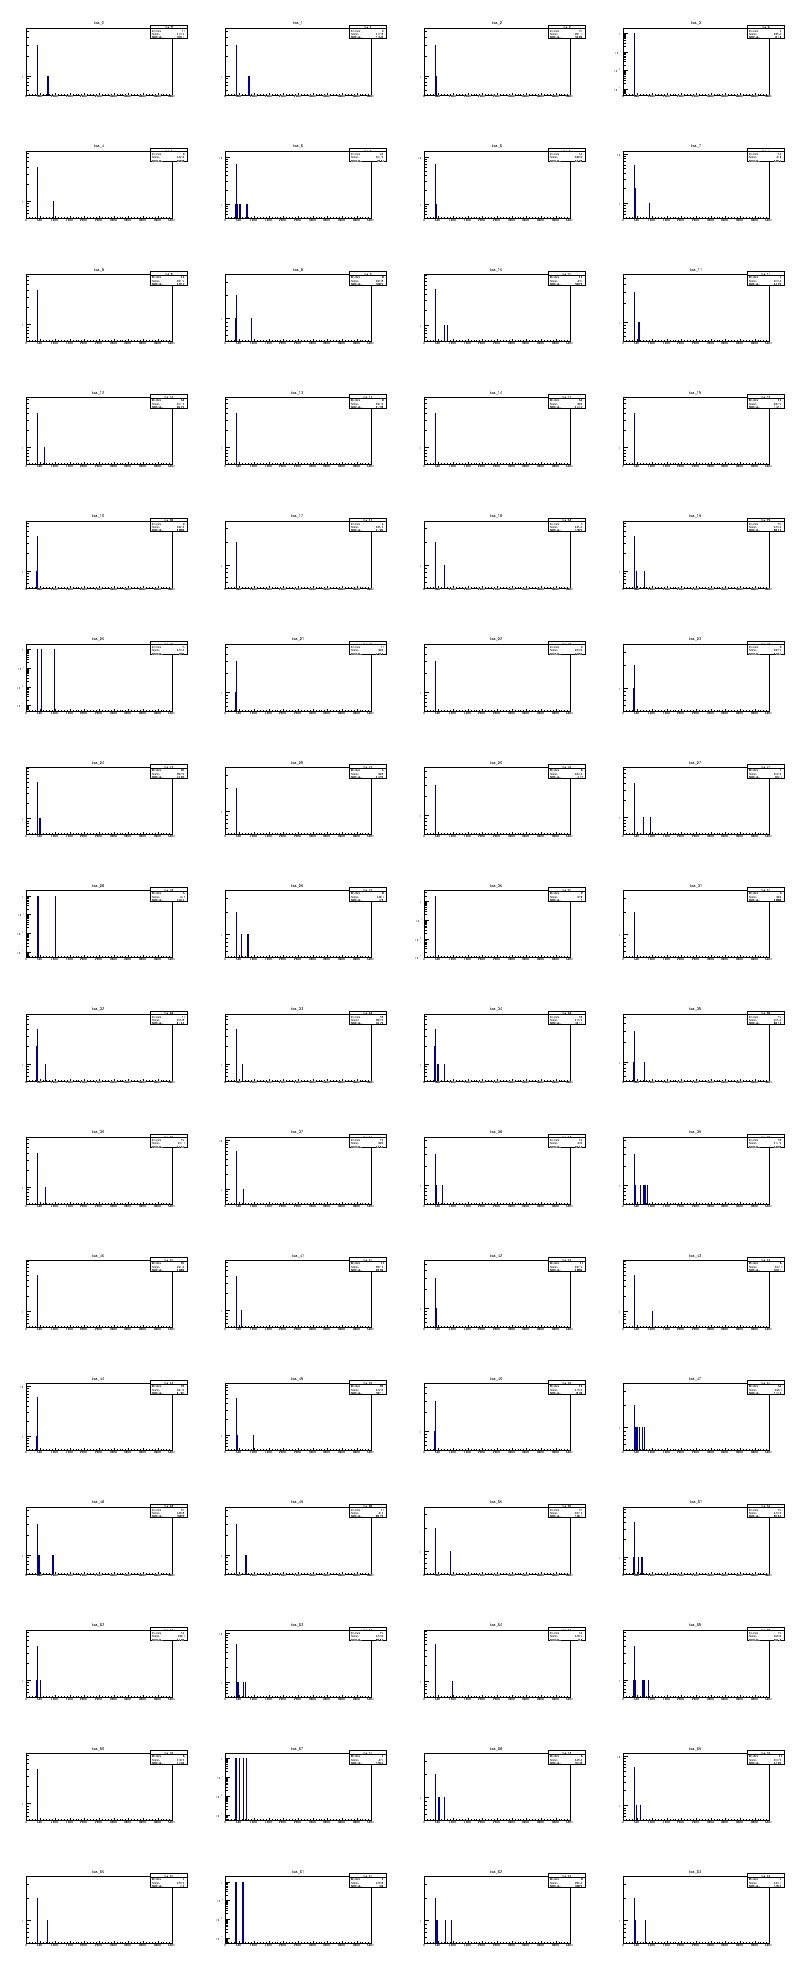

In [9]:
c3 = ROOT.TCanvas("c3","TOA",800,2000)

c3.Divide(4,16)
for i in range(64):
    c3.cd(i+1)
    c3.GetPad(i+1).SetLogy()
    s="toa_"+str(i)
    h1[s].Draw()
c3.Draw()